In [2]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import instruments as inst
import numpy as np
import json

# Step 1: Setting up initial information

In [3]:
# Data path for processed csv
file_path = custom_module_path + "/20230914_processed_table.csv"
wavelengths = ["625-50", 610, "675-50", 670, "725-50", 720, "750-50", 760, 
    "775-50"]
obs_modes = ["IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL"]
previous_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/initial/"
save_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/"
em_gains = [1.139634, 1.230573943788524, 1.177732, 1.1946169522853136, 1.184177, 
    1.1968557857131294, 1.180120, 1.0798052820150867, 1.190700]
bounds = [ 
    (0, 2 * np.pi), # dichroic_retardance
    (0, 1), # dichroic_diattenuation
    (-90, 90), # dichroic_rotation_angle 
    (0.4 * 2 * np.pi, 0.6 * 2 * np.pi),  # delta_FLC
    (-5, 5),  # rot_FLC
    (0, 2 * np.pi),  # delta_opts
    (0, 1),  # epsilon_opts
    (-90, 90),  # rot_opts
    (0, 2 * np.pi),  # delta_derot
    (0, 2 * np.pi),  # delta_HWP
    (-5, 5),  # offset_HWP
    (-5, 5),  # theta_pol
]

# Step 2: Performing fits iteratively by wavelength - first broadband then MBI

{'dichroic': {'phi': 0.30872304463963207, 'epsilon': 0.010945621474919988, 'theta': 1.8315213575483158}, 'flc': {'phi': 3.318462559843585, 'delta_theta': 1.798029718547543}, 'optics': {'phi': -0.8083964583195624, 'epsilon': 0.013895280106864007, 'theta': 18.01712022177098}, 'image_rotator': {'phi': 1.365065666004961}, 'hwp': {'phi': 2.752521179595714, 'delta_theta': -1.9748257333612886}, 'lp': {'theta': -0.15074376412465285}}
[[ 0.52796105  0.52795374 -0.00277809  0.        ]
 [ 0.52796105  0.52795374 -0.00277809  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
logl value: 2586.0156400186875


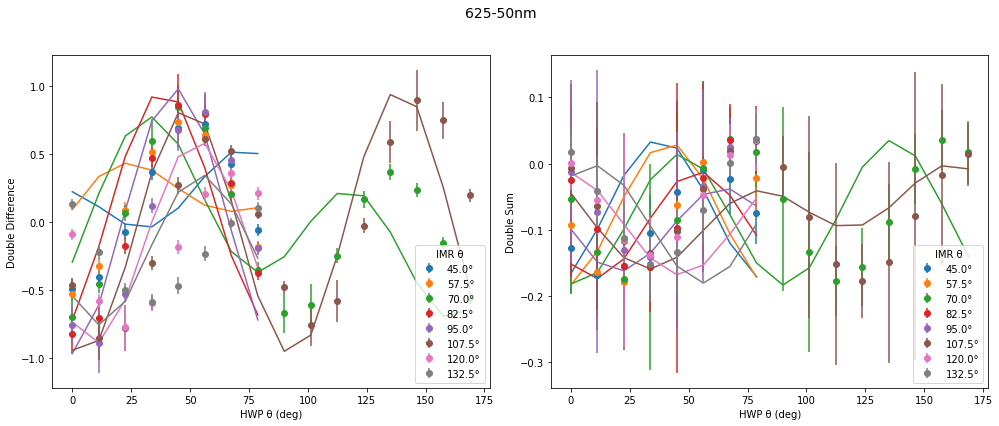

Before p0: {'dichroic': {'phi': 0.30872304463963207, 'epsilon': 0.010945621474919988, 'theta': 1.8315213575483158}, 'flc': {'phi': 3.318462559843585, 'delta_theta': 1.798029718547543}, 'optics': {'phi': 0.8083964583195624, 'epsilon': 0.013895280106864007, 'theta': 18.01712022177098}, 'image_rotator': {'phi': 1.365065666004961}, 'hwp': {'phi': 2.752521179595714, 'delta_theta': -1.9748257333612886}, 'lp': {'theta': -0.15074376412465285}}
Iteration #: 1
logl_value: 12.175701349290833
Best Fit Parameters: [ 1.97983462e+00  1.16686536e-02  4.07508008e+00  3.11047342e+00
  3.98503752e+00  7.60342744e-01  3.41410702e-05 -7.56710436e+01
  1.35735488e+00  2.74415990e+00 -2.09357996e+00 -3.66948027e-01]


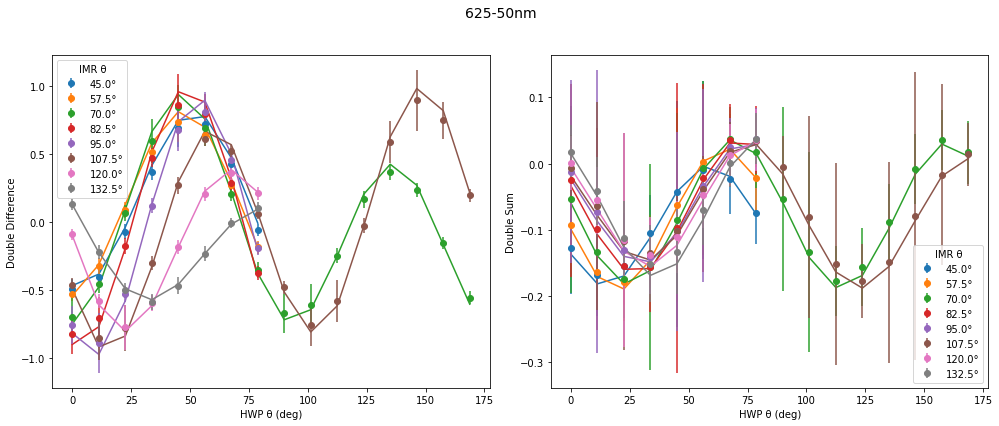

After p0: {'dichroic': {'phi': 1.9798346207434059, 'epsilon': 0.01166865360001082, 'theta': 4.0750800751662535}, 'flc': {'phi': 3.110473419820311, 'delta_theta': 3.9850375223770005}, 'optics': {'phi': 0.7603427440195341, 'epsilon': 3.414107017181108e-05, 'theta': -75.67104364874814}, 'image_rotator': {'phi': 1.3573548842245375}, 'hwp': {'phi': 2.7441599021123566, 'delta_theta': -2.093579962939402}, 'lp': {'theta': -0.3669480267091577}}
Before p0: {'dichroic': {'phi': 1.9798346207434059, 'epsilon': 0.01166865360001082, 'theta': 4.0750800751662535}, 'flc': {'phi': 3.110473419820311, 'delta_theta': 3.9850375223770005}, 'optics': {'phi': 0.7603427440195341, 'epsilon': 3.414107017181108e-05, 'theta': -75.67104364874814}, 'image_rotator': {'phi': 1.3573548842245375}, 'hwp': {'phi': 2.7441599021123566, 'delta_theta': -2.093579962939402}, 'lp': {'theta': -0.3669480267091577}}
Iteration #: 2
logl_value: 11.63138489087546
Best Fit Parameters: [ 1.32202457e+00  4.28592276e-03  4.17950372e+00  3.0

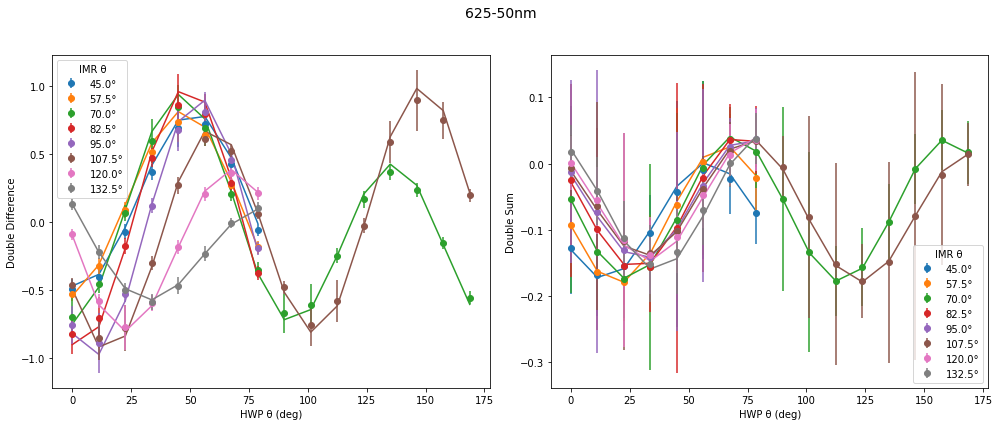

After p0: {'dichroic': {'phi': 1.322024570510468, 'epsilon': 0.004285922755947616, 'theta': 4.179503719745558}, 'flc': {'phi': 3.0841412740173153, 'delta_theta': 2.720563311064012}, 'optics': {'phi': 0.717346879861295, 'epsilon': 4.011820640062921e-08, 'theta': -75.34864256959904}, 'image_rotator': {'phi': 1.358046731691757}, 'hwp': {'phi': 2.744431984296315, 'delta_theta': -1.912528264208913}, 'lp': {'theta': -0.09159804380170548}}
Before p0: {'dichroic': {'phi': 1.322024570510468, 'epsilon': 0.004285922755947616, 'theta': 4.179503719745558}, 'flc': {'phi': 3.0841412740173153, 'delta_theta': 2.720563311064012}, 'optics': {'phi': 0.717346879861295, 'epsilon': 4.011820640062921e-08, 'theta': -75.34864256959904}, 'image_rotator': {'phi': 1.358046731691757}, 'hwp': {'phi': 2.744431984296315, 'delta_theta': -1.912528264208913}, 'lp': {'theta': -0.09159804380170548}}
Iteration #: 3
logl_value: 11.603294487792922
Best Fit Parameters: [ 1.46021294e+00  4.63654013e-03  8.27483434e+00  2.753722

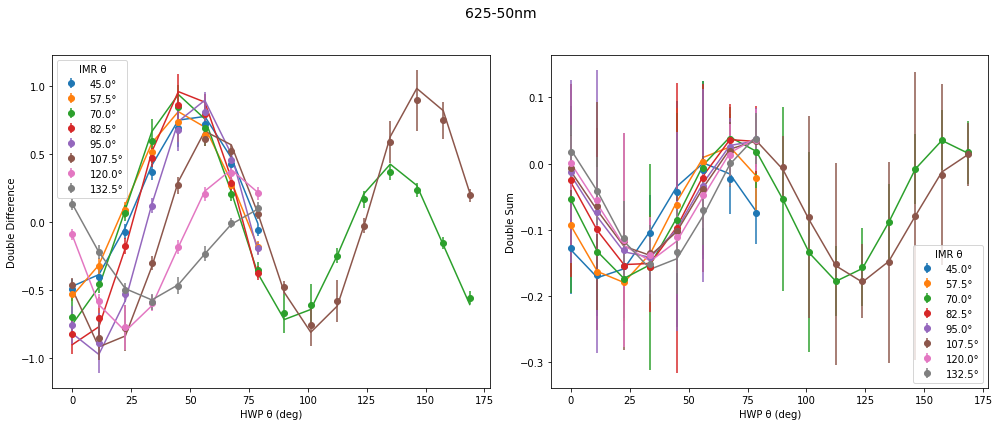

After p0: {'dichroic': {'phi': 1.4602129402888262, 'epsilon': 0.004636540133101087, 'theta': 8.274834343812845}, 'flc': {'phi': 2.753722235091203, 'delta_theta': 4.998827609224682}, 'optics': {'phi': 0.2145608020807765, 'epsilon': 1.749711180649424e-08, 'theta': -70.95396868275728}, 'image_rotator': {'phi': 1.3583383162826719}, 'hwp': {'phi': 2.7444277853375203, 'delta_theta': -1.759830189043341}, 'lp': {'theta': 0.17251059724371326}}
{'dichroic': {'phi': 1.4602129402888262, 'epsilon': 0.004636540133101087, 'theta': 8.274834343812845}, 'flc': {'phi': 2.753722235091203, 'delta_theta': 4.998827609224682}, 'optics': {'phi': 0.2145608020807765, 'epsilon': 1.749711180649424e-08, 'theta': -70.95396868275728}, 'image_rotator': {'phi': 1.3583383162826719}, 'hwp': {'phi': 2.7444277853375203, 'delta_theta': -1.759830189043341}, 'lp': {'theta': 0.17251059724371326}}
[[0.53496187 0.53495217 0.00322139 0.        ]
 [0.53496187 0.53495217 0.00322139 0.        ]
 [0.         0.         0.         0. 

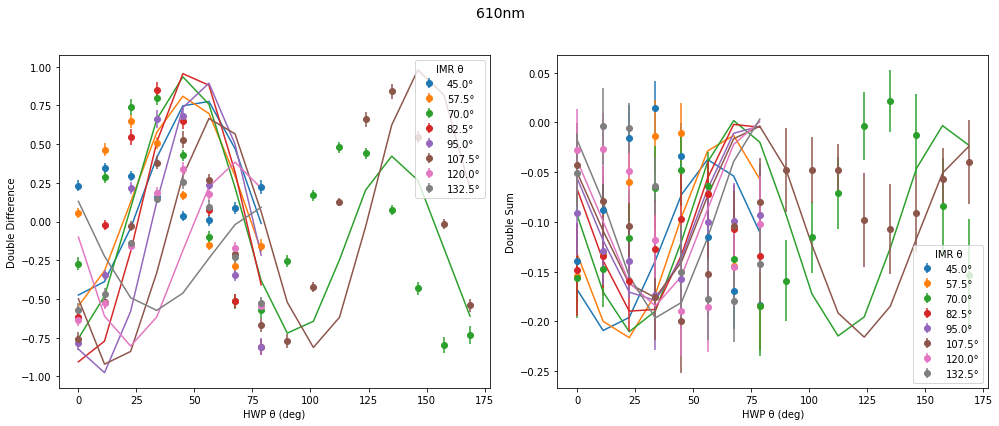

Before p0: {'dichroic': {'phi': 1.4602129402888262, 'epsilon': 0.004636540133101087, 'theta': 8.274834343812845}, 'flc': {'phi': 2.753722235091203, 'delta_theta': 4.998827609224682}, 'optics': {'phi': 0.2145608020807765, 'epsilon': 1.749711180649424e-08, 'theta': -70.95396868275728}, 'image_rotator': {'phi': 1.3583383162826719}, 'hwp': {'phi': 2.7444277853375203, 'delta_theta': -1.759830189043341}, 'lp': {'theta': 0.17251059724371326}}
Iteration #: 1
logl_value: 296.85410386100364
Best Fit Parameters: [ 3.64323822e+00  5.12196639e-07  6.76647249e+00  3.57113813e+00
  4.99987903e+00  8.52948226e-05  6.37719779e-09 -9.00000000e+01
  1.41006827e+00  2.86809080e+00  3.17088720e+00 -1.49047824e+00]


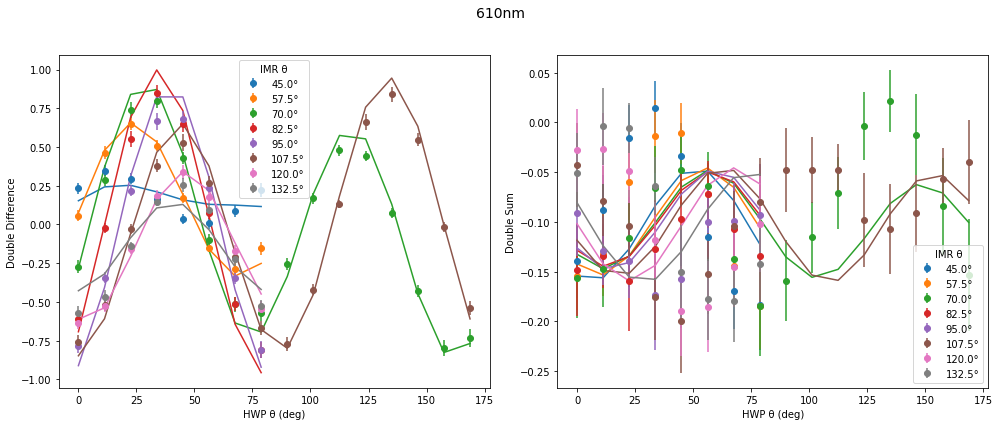

After p0: {'dichroic': {'phi': 3.6432382245416886, 'epsilon': 5.121966386219064e-07, 'theta': 6.766472487442922}, 'flc': {'phi': 3.571138126122692, 'delta_theta': 4.999879025284663}, 'optics': {'phi': 8.52948226174842e-05, 'epsilon': 6.3771977873318265e-09, 'theta': -90.0}, 'image_rotator': {'phi': 1.4100682746178625}, 'hwp': {'phi': 2.868090804158986, 'delta_theta': 3.170887201328683}, 'lp': {'theta': -1.4904782368660427}}
Before p0: {'dichroic': {'phi': 3.6432382245416886, 'epsilon': 5.121966386219064e-07, 'theta': 6.766472487442922}, 'flc': {'phi': 3.571138126122692, 'delta_theta': 4.999879025284663}, 'optics': {'phi': 8.52948226174842e-05, 'epsilon': 6.3771977873318265e-09, 'theta': -90.0}, 'image_rotator': {'phi': 1.4100682746178625}, 'hwp': {'phi': 2.868090804158986, 'delta_theta': 3.170887201328683}, 'lp': {'theta': -1.4904782368660427}}
Iteration #: 2
logl_value: 296.83972956299885
Best Fit Parameters: [ 3.64406938e+00  1.90529732e-09  6.76396557e+00  3.57103835e+00
  4.9999991

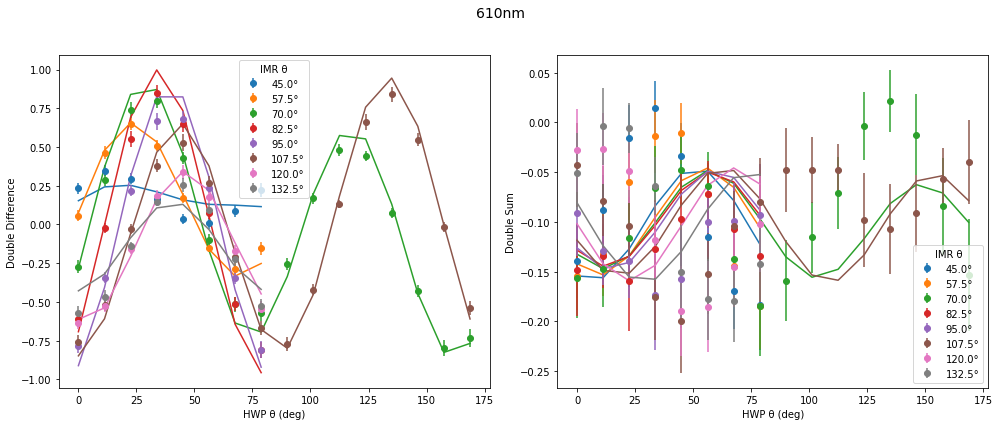

After p0: {'dichroic': {'phi': 3.644069379179795, 'epsilon': 1.905297317929478e-09, 'theta': 6.76396556553512}, 'flc': {'phi': 3.571038354623303, 'delta_theta': 4.9999991839091695}, 'optics': {'phi': 5.9444416486235226e-08, 'epsilon': 1.981666898558827e-10, 'theta': -90.0}, 'image_rotator': {'phi': 1.4098542508201515}, 'hwp': {'phi': 2.8683401855482398, 'delta_theta': 3.1144267697655508}, 'lp': {'theta': -1.6078317644302542}}
{'dichroic': {'phi': 0.04733853292768392, 'epsilon': 0.889005602066973, 'theta': 7.363875441142831}, 'flc': {'phi': 3.236652017975315, 'delta_theta': 4.546186664151351}, 'optics': {'phi': -1.1850125435869332, 'epsilon': 0.0024555025216879667, 'theta': 23.641950722287774}, 'image_rotator': {'phi': 2.0540040913796904}, 'hwp': {'phi': 2.8968588187352555, 'delta_theta': 0.8586561161067474}, 'lp': {'theta': 3.664949549384702}}
[[0.96007542 0.95222968 0.12248853 0.        ]
 [0.96007542 0.95222968 0.12248853 0.        ]
 [0.         0.         0.         0.        ]
 [0

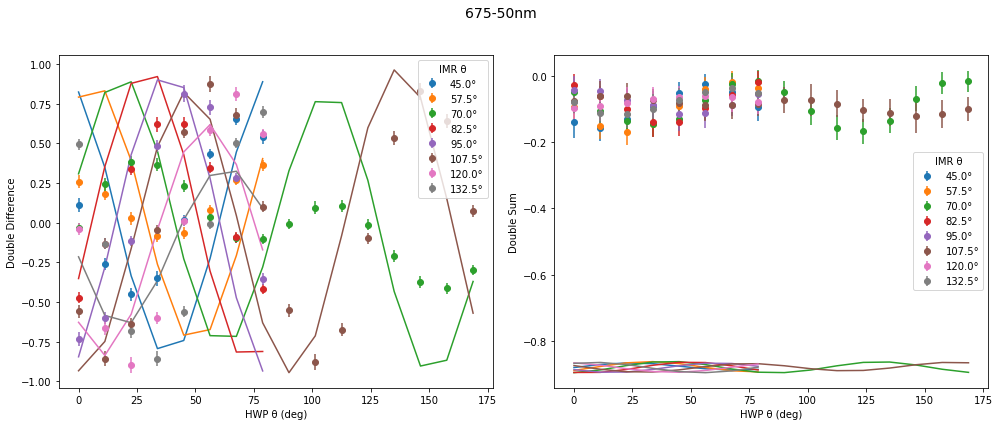

Before p0: {'dichroic': {'phi': 0.04733853292768392, 'epsilon': 0.889005602066973, 'theta': 7.363875441142831}, 'flc': {'phi': 3.236652017975315, 'delta_theta': 4.546186664151351}, 'optics': {'phi': 1.1850125435869332, 'epsilon': 0.0024555025216879667, 'theta': 23.641950722287774}, 'image_rotator': {'phi': 2.0540040913796904}, 'hwp': {'phi': 2.8968588187352555, 'delta_theta': 0.8586561161067474}, 'lp': {'theta': 3.664949549384702}}
Iteration #: 1
logl_value: 96.25522563458594
Best Fit Parameters: [3.84858770e-01 3.91580619e-03 7.09779613e+00 3.07386602e+00
 4.99191955e+00 4.63038965e+00 3.01280603e-04 1.78546666e+01
 2.05800717e+00 2.92460251e+00 1.19572068e+00 3.46667031e+00]


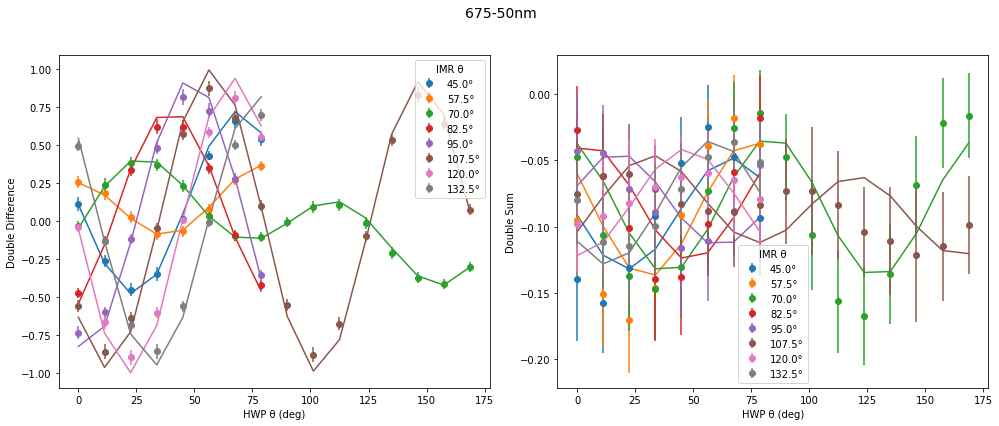

After p0: {'dichroic': {'phi': 0.38485877012801395, 'epsilon': 0.003915806186115954, 'theta': 7.097796134542239}, 'flc': {'phi': 3.0738660190647407, 'delta_theta': 4.991919553084321}, 'optics': {'phi': 4.630389652381162, 'epsilon': 0.00030128060330699823, 'theta': 17.85466658934501}, 'image_rotator': {'phi': 2.058007166221394}, 'hwp': {'phi': 2.924602508180845, 'delta_theta': 1.195720677392758}, 'lp': {'theta': 3.4666703111799295}}
Before p0: {'dichroic': {'phi': 0.38485877012801395, 'epsilon': 0.003915806186115954, 'theta': 7.097796134542239}, 'flc': {'phi': 3.0738660190647407, 'delta_theta': 4.991919553084321}, 'optics': {'phi': 4.630389652381162, 'epsilon': 0.00030128060330699823, 'theta': 17.85466658934501}, 'image_rotator': {'phi': 2.058007166221394}, 'hwp': {'phi': 2.924602508180845, 'delta_theta': 1.195720677392758}, 'lp': {'theta': 3.4666703111799295}}
Iteration #: 2
logl_value: 94.39566300428515
Best Fit Parameters: [1.23730197e-01 3.56896932e-03 2.68259159e+01 3.06711158e+00


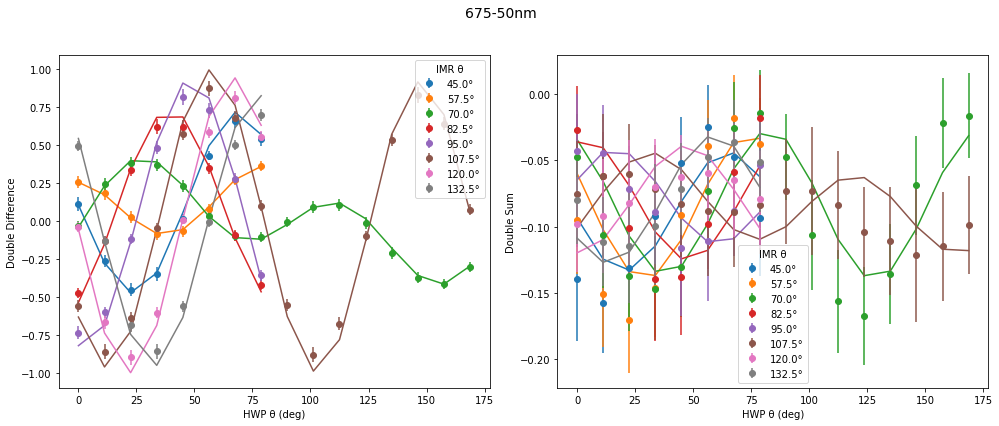

After p0: {'dichroic': {'phi': 0.12373019693601653, 'epsilon': 0.0035689693226284174, 'theta': 26.825915916024236}, 'flc': {'phi': 3.0671115790755623, 'delta_theta': 4.9496413241258805}, 'optics': {'phi': 4.6936164669066445, 'epsilon': 0.0010061574979367727, 'theta': 18.297592841135014}, 'image_rotator': {'phi': 2.0621468799766385}, 'hwp': {'phi': 2.924692107651167, 'delta_theta': 0.4054252757479571}, 'lp': {'theta': 1.7057641467850906}}
Before p0: {'dichroic': {'phi': 0.12373019693601653, 'epsilon': 0.0035689693226284174, 'theta': 26.825915916024236}, 'flc': {'phi': 3.0671115790755623, 'delta_theta': 4.9496413241258805}, 'optics': {'phi': 4.6936164669066445, 'epsilon': 0.0010061574979367727, 'theta': 18.297592841135014}, 'image_rotator': {'phi': 2.0621468799766385}, 'hwp': {'phi': 2.924692107651167, 'delta_theta': 0.4054252757479571}, 'lp': {'theta': 1.7057641467850906}}
Iteration #: 3
logl_value: 85.14828780672873
Best Fit Parameters: [ 1.13524803e+00  3.90254954e-05  8.28192601e+01 

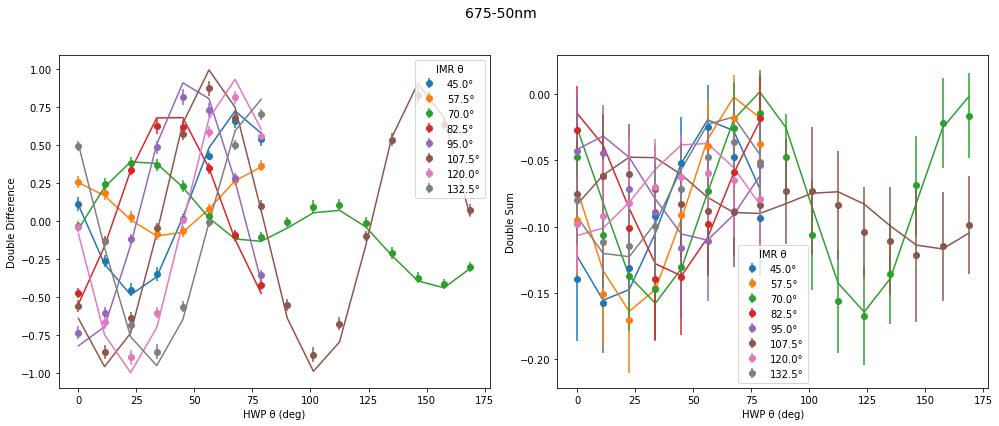

After p0: {'dichroic': {'phi': 1.1352480339869624, 'epsilon': 3.9025495362538586e-05, 'theta': 82.81926014163662}, 'flc': {'phi': 2.913232404322346, 'delta_theta': 4.936882456937656}, 'optics': {'phi': 5.270334328491563, 'epsilon': 0.026717726284365195, 'theta': 22.265381106009475}, 'image_rotator': {'phi': 2.041465390673567}, 'hwp': {'phi': 2.9044044128810533, 'delta_theta': -1.1932089231931757}, 'lp': {'theta': -0.7228459477244604}}
Before p0: {'dichroic': {'phi': 1.1352480339869624, 'epsilon': 3.9025495362538586e-05, 'theta': 82.81926014163662}, 'flc': {'phi': 2.913232404322346, 'delta_theta': 4.936882456937656}, 'optics': {'phi': 5.270334328491563, 'epsilon': 0.026717726284365195, 'theta': 22.265381106009475}, 'image_rotator': {'phi': 2.041465390673567}, 'hwp': {'phi': 2.9044044128810533, 'delta_theta': -1.1932089231931757}, 'lp': {'theta': -0.7228459477244604}}
Iteration #: 4
logl_value: 71.62988027162484
Best Fit Parameters: [ 1.46978977e+00  2.30594122e-06  8.32663196e+01  2.903

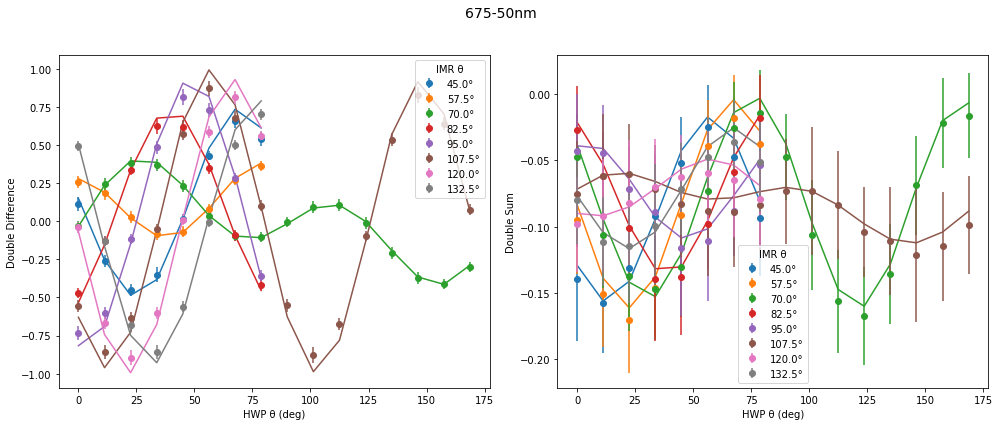

After p0: {'dichroic': {'phi': 1.4697897693110775, 'epsilon': 2.305941222465201e-06, 'theta': 83.2663195579342}, 'flc': {'phi': 2.9039963583357165, 'delta_theta': 4.9738257405591}, 'optics': {'phi': 5.470709905349786, 'epsilon': 0.001491475899469462, 'theta': 24.02593024692155}, 'image_rotator': {'phi': 2.0115976460207228}, 'hwp': {'phi': 2.9165661129634577, 'delta_theta': -1.3984595695473547}, 'lp': {'theta': -0.26883872666656233}}
Before p0: {'dichroic': {'phi': 1.4697897693110775, 'epsilon': 2.305941222465201e-06, 'theta': 83.2663195579342}, 'flc': {'phi': 2.9039963583357165, 'delta_theta': 4.9738257405591}, 'optics': {'phi': 5.470709905349786, 'epsilon': 0.001491475899469462, 'theta': 24.02593024692155}, 'image_rotator': {'phi': 2.0115976460207228}, 'hwp': {'phi': 2.9165661129634577, 'delta_theta': -1.3984595695473547}, 'lp': {'theta': -0.26883872666656233}}
Iteration #: 5
logl_value: 71.62649450891254
Best Fit Parameters: [ 1.59048999e+00  7.26268508e-06  8.43629892e+01  2.9618171

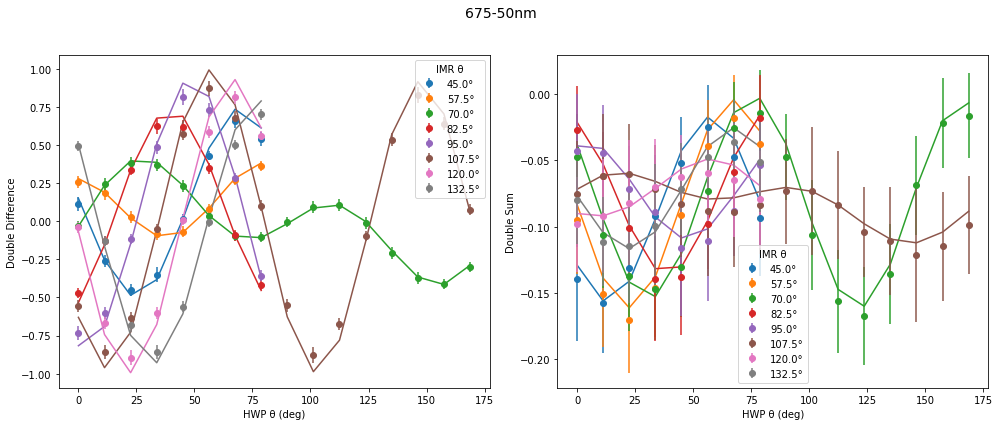

After p0: {'dichroic': {'phi': 1.5904899902790914, 'epsilon': 7.262685077985205e-06, 'theta': 84.36298916775479}, 'flc': {'phi': 2.9618171563473474, 'delta_theta': 4.997405188476783}, 'optics': {'phi': 5.357476450121634, 'epsilon': 0.0016287319591159052, 'theta': 23.424057775412223}, 'image_rotator': {'phi': 2.011737597035337}, 'hwp': {'phi': 2.916377552543546, 'delta_theta': -1.377243285501816}, 'lp': {'theta': -0.22800057018256326}}
{'dichroic': {'phi': 1.5904899902790914, 'epsilon': 7.262685077985205e-06, 'theta': 84.36298916775479}, 'flc': {'phi': 2.9618171563473474, 'delta_theta': 4.997405188476783}, 'optics': {'phi': 5.357476450121634, 'epsilon': 0.0016287319591159052, 'theta': 23.424057775412223}, 'image_rotator': {'phi': 2.011737597035337}, 'hwp': {'phi': 2.916377552543546, 'delta_theta': -1.377243285501816}, 'lp': {'theta': -0.22800057018256326}}
[[ 0.25790696  0.25789879 -0.00205259  0.        ]
 [ 0.25790696  0.25789879 -0.00205259  0.        ]
 [ 0.          0.          0. 

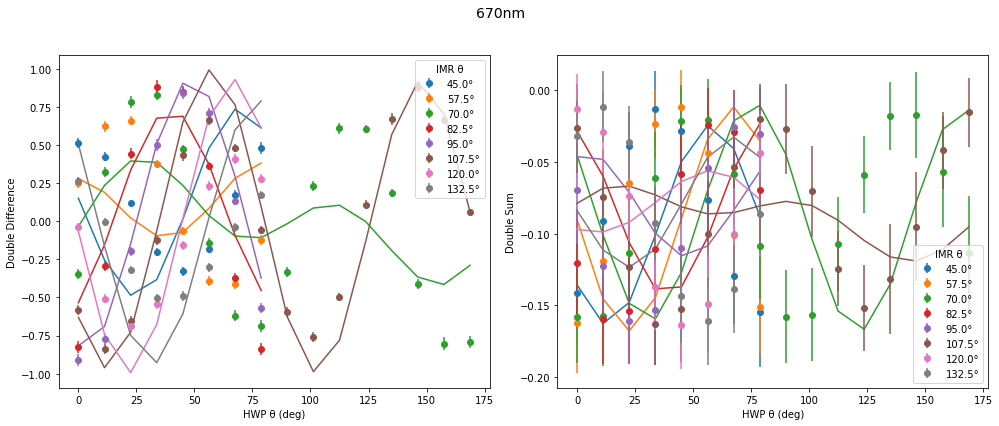

Before p0: {'dichroic': {'phi': 1.5904899902790914, 'epsilon': 7.262685077985205e-06, 'theta': 84.36298916775479}, 'flc': {'phi': 2.9618171563473474, 'delta_theta': 4.997405188476783}, 'optics': {'phi': 5.357476450121634, 'epsilon': 0.0016287319591159052, 'theta': 23.424057775412223}, 'image_rotator': {'phi': 2.011737597035337}, 'hwp': {'phi': 2.916377552543546, 'delta_theta': -1.377243285501816}, 'lp': {'theta': -0.22800057018256326}}
Iteration #: 1
logl_value: 21.33075145616234
Best Fit Parameters: [ 6.14556099e-01  1.61138626e-05  8.53119392e+01  3.10778326e+00
 -2.03586256e-01  5.52815277e+00  1.19213924e-03 -8.27429326e+01
  1.98828570e+00  2.89193306e+00 -1.85936322e+00 -1.05952124e+00]


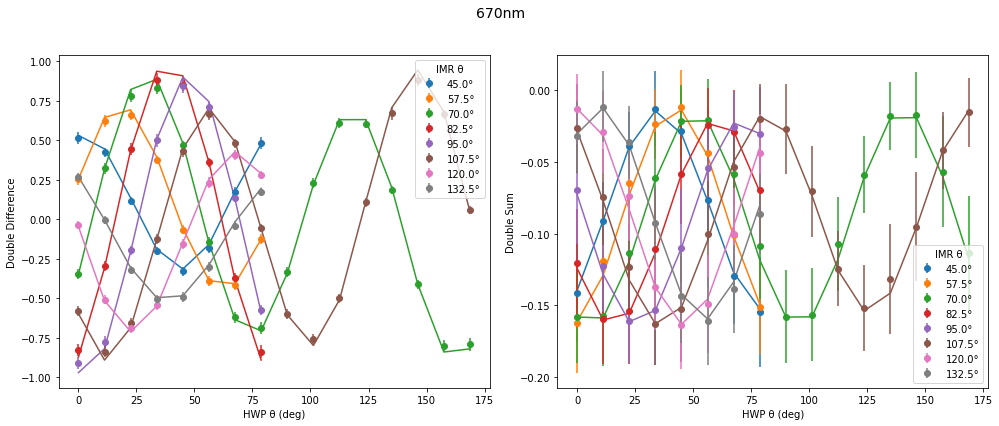

After p0: {'dichroic': {'phi': 0.6145560987452774, 'epsilon': 1.6113862621091924e-05, 'theta': 85.31193918459729}, 'flc': {'phi': 3.1077832637510108, 'delta_theta': -0.20358625649605888}, 'optics': {'phi': 5.528152773406713, 'epsilon': 0.001192139235696356, 'theta': -82.74293264341009}, 'image_rotator': {'phi': 1.9882856967441924}, 'hwp': {'phi': 2.8919330647519983, 'delta_theta': -1.8593632205049584}, 'lp': {'theta': -1.0595212378025813}}
Before p0: {'dichroic': {'phi': 0.6145560987452774, 'epsilon': 1.6113862621091924e-05, 'theta': 85.31193918459729}, 'flc': {'phi': 3.1077832637510108, 'delta_theta': -0.20358625649605888}, 'optics': {'phi': 5.528152773406713, 'epsilon': 0.001192139235696356, 'theta': -82.74293264341009}, 'image_rotator': {'phi': 1.9882856967441924}, 'hwp': {'phi': 2.8919330647519983, 'delta_theta': -1.8593632205049584}, 'lp': {'theta': -1.0595212378025813}}
Iteration #: 2
logl_value: 19.72285894905483
Best Fit Parameters: [ 9.81702699e-01  5.71542279e-05  8.49669470e

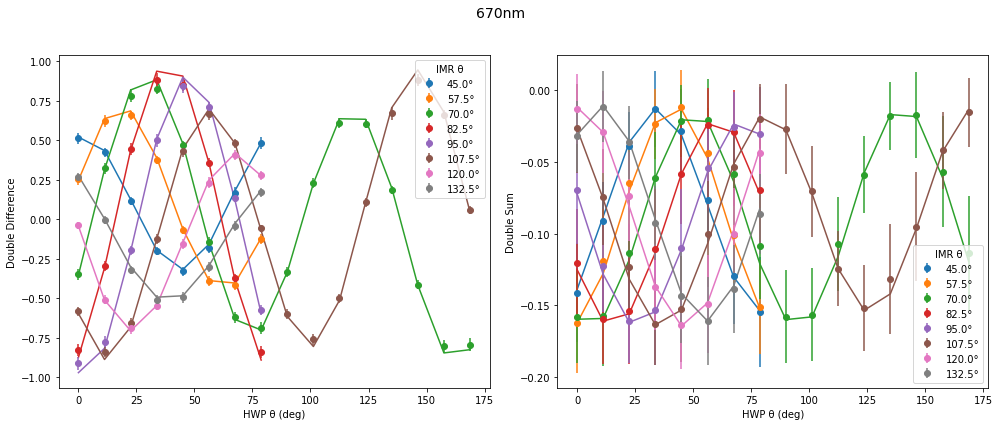

After p0: {'dichroic': {'phi': 0.9817026992555675, 'epsilon': 5.715422792544787e-05, 'theta': 84.96694701737971}, 'flc': {'phi': 3.011982074722118, 'delta_theta': -0.8740089073146633}, 'optics': {'phi': 5.380681659853025, 'epsilon': 3.2780227491308717e-07, 'theta': -82.3607285667984}, 'image_rotator': {'phi': 1.9877784607345106}, 'hwp': {'phi': 2.891895997088076, 'delta_theta': -0.528484155923747}, 'lp': {'theta': 1.501275024049665}}
Before p0: {'dichroic': {'phi': 0.9817026992555675, 'epsilon': 5.715422792544787e-05, 'theta': 84.96694701737971}, 'flc': {'phi': 3.011982074722118, 'delta_theta': -0.8740089073146633}, 'optics': {'phi': 5.380681659853025, 'epsilon': 3.2780227491308717e-07, 'theta': -82.3607285667984}, 'image_rotator': {'phi': 1.9877784607345106}, 'hwp': {'phi': 2.891895997088076, 'delta_theta': -0.528484155923747}, 'lp': {'theta': 1.501275024049665}}
Iteration #: 3
logl_value: 19.690898333427164
Best Fit Parameters: [ 1.02874092e+00  9.70906332e-04  8.55344048e+01  3.0351

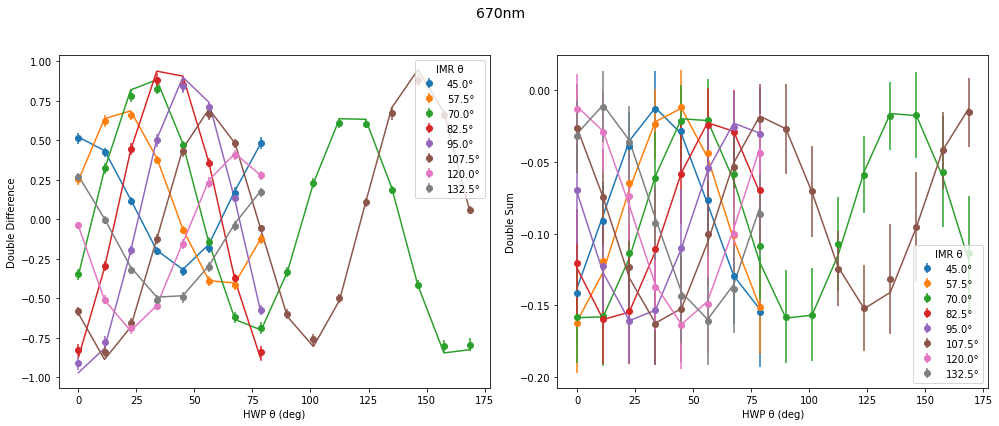

After p0: {'dichroic': {'phi': 1.0287409214843741, 'epsilon': 0.0009709063324351164, 'theta': 85.53440481348832}, 'flc': {'phi': 3.0351983639008164, 'delta_theta': -0.8548795423861519}, 'optics': {'phi': 5.410853789212705, 'epsilon': 1.5339812139097998e-07, 'theta': -82.49277571232656}, 'image_rotator': {'phi': 1.9877093510035406}, 'hwp': {'phi': 2.8919410329035014, 'delta_theta': -0.528001830265286}, 'lp': {'theta': 1.505736950804554}}
{'dichroic': {'phi': -0.008993624414963179, 'epsilon': 0.018482389580569993, 'theta': -0.007172417325267794}, 'flc': {'phi': 3.254754164606743, 'delta_theta': 4.071337175892329}, 'optics': {'phi': 0.5510028665782447, 'epsilon': 0.0039349157627214795, 'theta': -39.73119225284772}, 'image_rotator': {'phi': 2.8936096290210673}, 'hwp': {'phi': 3.0347536196537543, 'delta_theta': 3.409809501718911}, 'lp': {'theta': 4.999999960094904}}
[[0.00196658 0.00193671 0.00034149 0.        ]
 [0.00196658 0.00193671 0.00034149 0.        ]
 [0.         0.         0.      

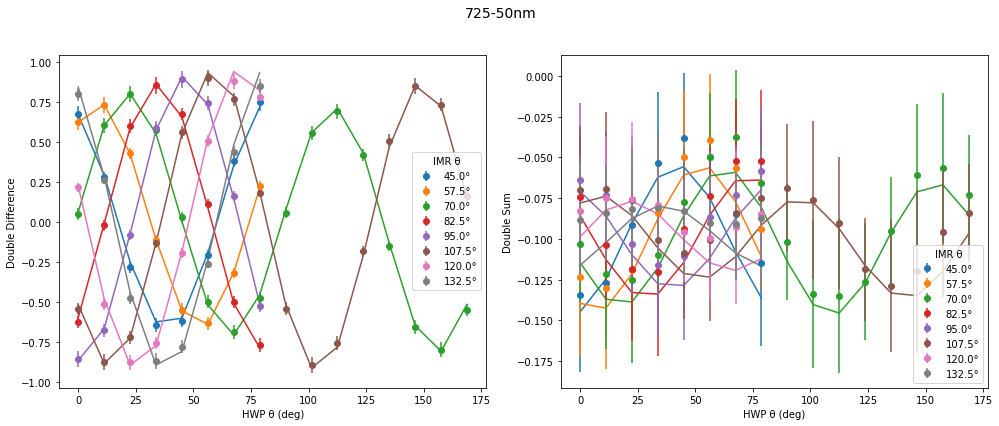

Before p0: {'dichroic': {'phi': 0.008993624414963179, 'epsilon': 0.018482389580569993, 'theta': -0.007172417325267794}, 'flc': {'phi': 3.254754164606743, 'delta_theta': 4.071337175892329}, 'optics': {'phi': 0.5510028665782447, 'epsilon': 0.0039349157627214795, 'theta': -39.73119225284772}, 'image_rotator': {'phi': 2.8936096290210673}, 'hwp': {'phi': 3.0347536196537543, 'delta_theta': 3.409809501718911}, 'lp': {'theta': 4.999999960094904}}
Iteration #: 1
logl_value: 14.247292763414835
Best Fit Parameters: [ 1.18808064e-02  6.62593472e-03 -8.94203945e-03  3.25476604e+00
  4.07137936e+00  5.51006210e-01  3.93533071e-03 -3.97305608e+01
  2.89361309e+00  3.03475377e+00  3.40980505e+00  5.00000000e+00]


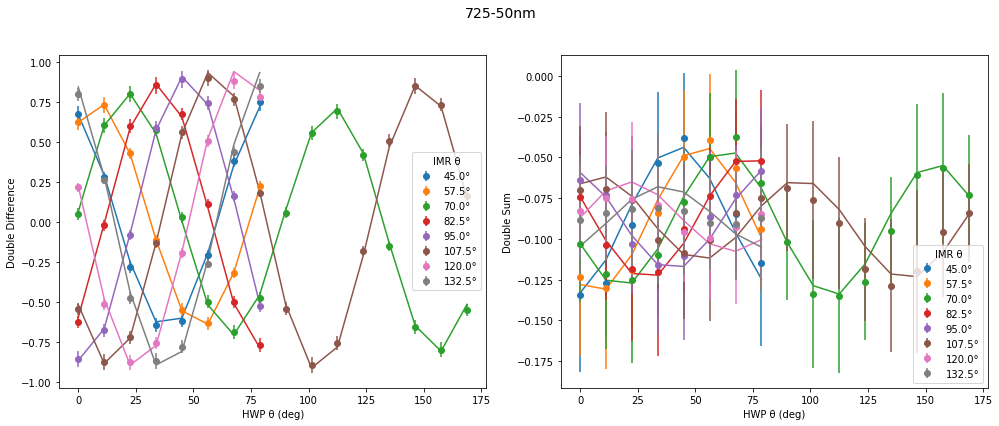

After p0: {'dichroic': {'phi': 0.011880806403150073, 'epsilon': 0.006625934723581115, 'theta': -0.008942039447662038}, 'flc': {'phi': 3.2547660409870094, 'delta_theta': 4.071379363182428}, 'optics': {'phi': 0.5510062101180482, 'epsilon': 0.003935330708458702, 'theta': -39.7305607564414}, 'image_rotator': {'phi': 2.893613092113637}, 'hwp': {'phi': 3.0347537727059457, 'delta_theta': 3.409805051606254}, 'lp': {'theta': 5.0}}
Before p0: {'dichroic': {'phi': 0.011880806403150073, 'epsilon': 0.006625934723581115, 'theta': -0.008942039447662038}, 'flc': {'phi': 3.2547660409870094, 'delta_theta': 4.071379363182428}, 'optics': {'phi': 0.5510062101180482, 'epsilon': 0.003935330708458702, 'theta': -39.7305607564414}, 'image_rotator': {'phi': 2.893613092113637}, 'hwp': {'phi': 3.0347537727059457, 'delta_theta': 3.409805051606254}, 'lp': {'theta': 5.0}}
Iteration #: 2
logl_value: 14.195824216995117
Best Fit Parameters: [ 4.65740763e-02  9.21504853e-03 -2.31587597e+01  3.31367558e+00
  4.15197771e+0

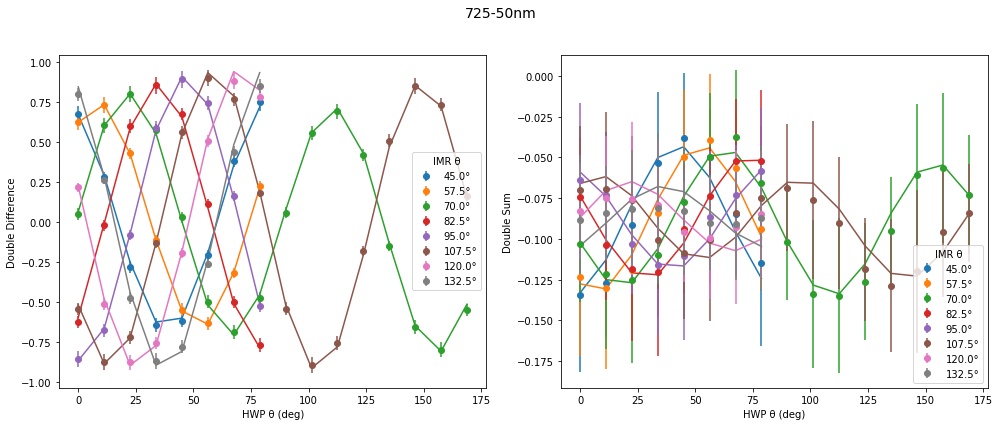

After p0: {'dichroic': {'phi': 0.04657407633330854, 'epsilon': 0.009215048532957102, 'theta': -23.158759656185616}, 'flc': {'phi': 3.313675578660007, 'delta_theta': 4.151977710988376}, 'optics': {'phi': 0.5718785261894699, 'epsilon': 0.0056790966677306536, 'theta': -38.047000331353814}, 'image_rotator': {'phi': 2.8924796223389935}, 'hwp': {'phi': 3.0348369326297915, 'delta_theta': 3.3873033455411328}, 'lp': {'theta': 4.998240753911732}}
{'dichroic': {'phi': 0.04657407633330854, 'epsilon': 0.009215048532957102, 'theta': -23.158759656185616}, 'flc': {'phi': 3.313675578660007, 'delta_theta': 4.151977710988376}, 'optics': {'phi': 0.5718785261894699, 'epsilon': 0.0056790966677306536, 'theta': -38.047000331353814}, 'image_rotator': {'phi': 2.8924796223389935}, 'hwp': {'phi': 3.0348369326297915, 'delta_theta': 3.3873033455411328}, 'lp': {'theta': 4.998240753911732}}
[[0.01042013 0.01026193 0.00180881 0.        ]
 [0.01042013 0.01026193 0.00180881 0.        ]
 [0.         0.         0.        

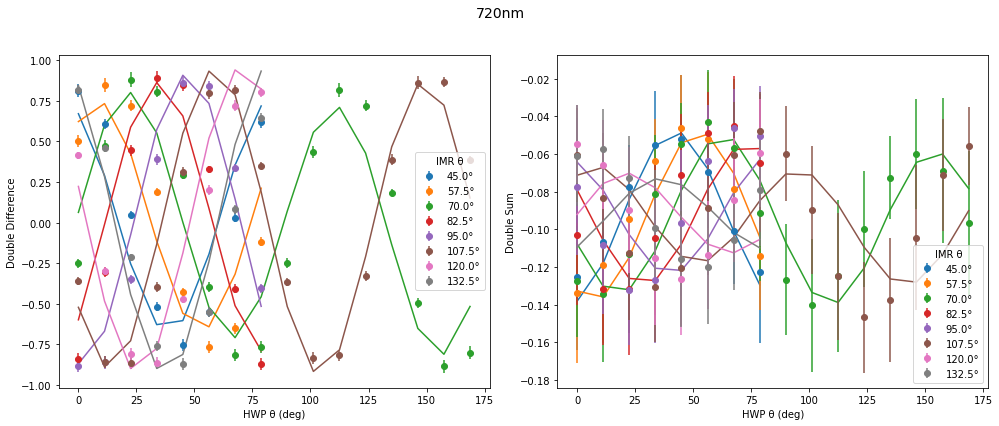

Before p0: {'dichroic': {'phi': 0.04657407633330854, 'epsilon': 0.009215048532957102, 'theta': -23.158759656185616}, 'flc': {'phi': 3.313675578660007, 'delta_theta': 4.151977710988376}, 'optics': {'phi': 0.5718785261894699, 'epsilon': 0.0056790966677306536, 'theta': -38.047000331353814}, 'image_rotator': {'phi': 2.8924796223389935}, 'hwp': {'phi': 3.0348369326297915, 'delta_theta': 3.3873033455411328}, 'lp': {'theta': 4.998240753911732}}
Iteration #: 1
logl_value: 129.6869519637528
Best Fit Parameters: [ 7.99218913e-02  6.81720660e-03 -3.81124654e+01  3.37014807e+00
 -2.04346821e-02  1.29553555e+00  2.65841857e-03 -1.58104945e+01
  3.02713331e+00  3.09351146e+00  4.91924248e+00  2.08798705e+00]


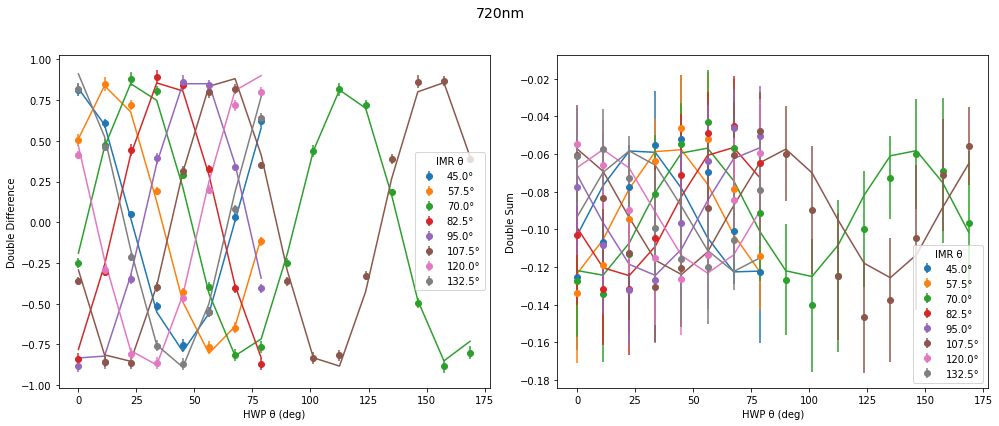

After p0: {'dichroic': {'phi': 0.0799218913453108, 'epsilon': 0.006817206596533884, 'theta': -38.11246540129406}, 'flc': {'phi': 3.3701480662159735, 'delta_theta': -0.020434682148084395}, 'optics': {'phi': 1.295535553671336, 'epsilon': 0.002658418567935269, 'theta': -15.810494543005294}, 'image_rotator': {'phi': 3.027133305292791}, 'hwp': {'phi': 3.0935114609767975, 'delta_theta': 4.9192424848000265}, 'lp': {'theta': 2.0879870493970785}}
Before p0: {'dichroic': {'phi': 0.0799218913453108, 'epsilon': 0.006817206596533884, 'theta': -38.11246540129406}, 'flc': {'phi': 3.3701480662159735, 'delta_theta': -0.020434682148084395}, 'optics': {'phi': 1.295535553671336, 'epsilon': 0.002658418567935269, 'theta': -15.810494543005294}, 'image_rotator': {'phi': 3.027133305292791}, 'hwp': {'phi': 3.0935114609767975, 'delta_theta': 4.9192424848000265}, 'lp': {'theta': 2.0879870493970785}}
Iteration #: 2
logl_value: 111.62954188038375
Best Fit Parameters: [ 8.87445436e-02  2.34112391e-03 -2.49903941e+01

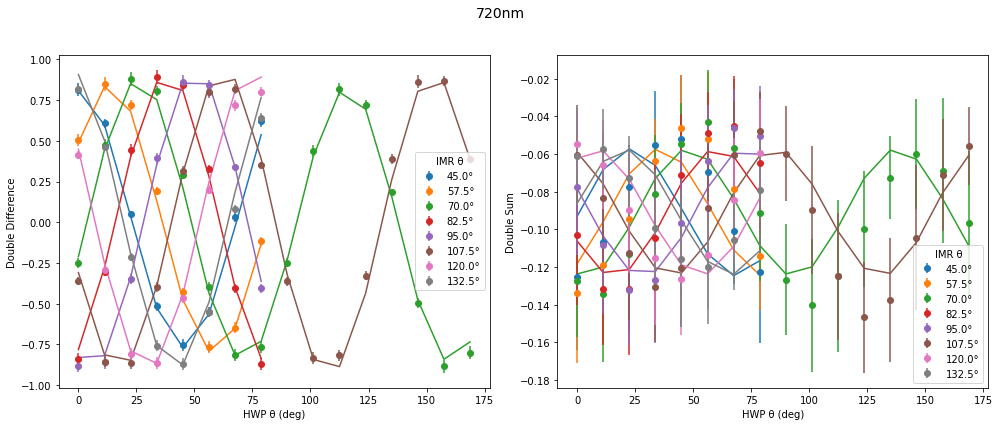

After p0: {'dichroic': {'phi': 0.08874454360389095, 'epsilon': 0.0023411239138206473, 'theta': -24.990394138708474}, 'flc': {'phi': 3.3450994641788228, 'delta_theta': -0.3860347626970426}, 'optics': {'phi': 1.6890064391482391, 'epsilon': 0.02162857003765476, 'theta': -15.42519951565857}, 'image_rotator': {'phi': 3.0076223517459404}, 'hwp': {'phi': 3.086388469000978, 'delta_theta': 4.804238384402499}, 'lp': {'theta': -4.758403666621502}}
Before p0: {'dichroic': {'phi': 0.08874454360389095, 'epsilon': 0.0023411239138206473, 'theta': -24.990394138708474}, 'flc': {'phi': 3.3450994641788228, 'delta_theta': -0.3860347626970426}, 'optics': {'phi': 1.6890064391482391, 'epsilon': 0.02162857003765476, 'theta': -15.42519951565857}, 'image_rotator': {'phi': 3.0076223517459404}, 'hwp': {'phi': 3.086388469000978, 'delta_theta': 4.804238384402499}, 'lp': {'theta': -4.758403666621502}}
Iteration #: 3
logl_value: 108.66271916846925
Best Fit Parameters: [ 6.43694673e-02  9.02127981e-02 -4.49138346e+01  

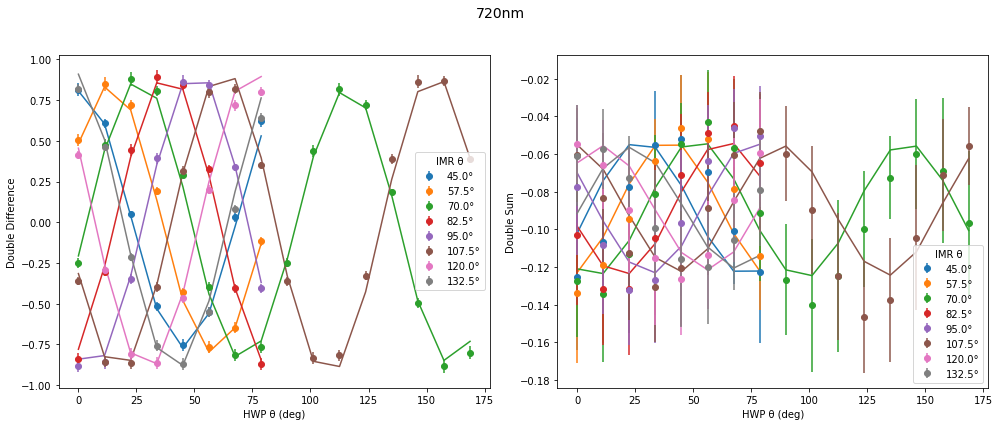

After p0: {'dichroic': {'phi': 0.0643694673491528, 'epsilon': 0.09021279806374624, 'theta': -44.91383464958125}, 'flc': {'phi': 3.3748264624582376, 'delta_theta': -3.4890503120106526}, 'optics': {'phi': 1.3300403834020913, 'epsilon': 0.019729429289695344, 'theta': -22.994188780583713}, 'image_rotator': {'phi': 2.999640124864966}, 'hwp': {'phi': 3.085157749365984, 'delta_theta': 4.986353889176316}, 'lp': {'theta': -4.998500658890444}}
Before p0: {'dichroic': {'phi': 0.0643694673491528, 'epsilon': 0.09021279806374624, 'theta': -44.91383464958125}, 'flc': {'phi': 3.3748264624582376, 'delta_theta': -3.4890503120106526}, 'optics': {'phi': 1.3300403834020913, 'epsilon': 0.019729429289695344, 'theta': -22.994188780583713}, 'image_rotator': {'phi': 2.999640124864966}, 'hwp': {'phi': 3.085157749365984, 'delta_theta': 4.986353889176316}, 'lp': {'theta': -4.998500658890444}}
Iteration #: 4
logl_value: 44.7740385952406
Best Fit Parameters: [ 6.88149036e-02  3.37820737e-01 -4.46207063e+01  3.411365

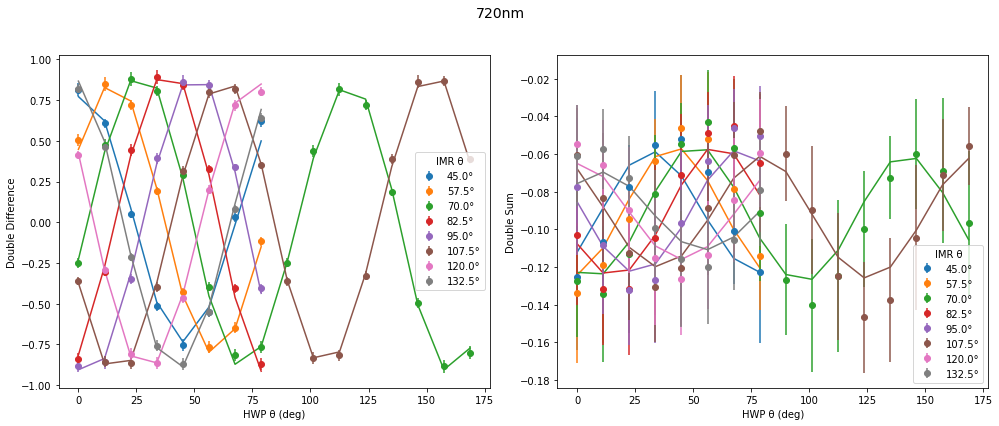

After p0: {'dichroic': {'phi': 0.06881490357156551, 'epsilon': 0.33782073665619755, 'theta': -44.62070626029169}, 'flc': {'phi': 3.411365891614654, 'delta_theta': -4.982879598328777}, 'optics': {'phi': 0.8340109533063121, 'epsilon': 0.01180148881207441, 'theta': -17.385759470561013}, 'image_rotator': {'phi': 2.6386355709900355}, 'hwp': {'phi': 3.0235716090005003, 'delta_theta': 1.8875736169778359}, 'lp': {'theta': -4.795100484547538}}
Before p0: {'dichroic': {'phi': 0.06881490357156551, 'epsilon': 0.33782073665619755, 'theta': -44.62070626029169}, 'flc': {'phi': 3.411365891614654, 'delta_theta': -4.982879598328777}, 'optics': {'phi': 0.8340109533063121, 'epsilon': 0.01180148881207441, 'theta': -17.385759470561013}, 'image_rotator': {'phi': 2.6386355709900355}, 'hwp': {'phi': 3.0235716090005003, 'delta_theta': 1.8875736169778359}, 'lp': {'theta': -4.795100484547538}}
Iteration #: 5
logl_value: 13.29654459043479
Best Fit Parameters: [ 3.35567079e-06  2.86122108e-01 -4.47711926e+01  3.298

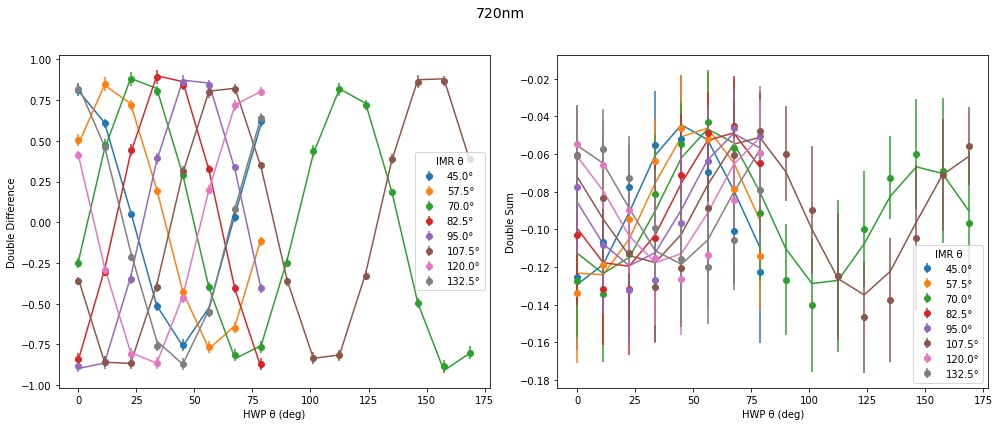

After p0: {'dichroic': {'phi': 3.355670785895353e-06, 'epsilon': 0.28612210808884, 'theta': -44.77119262188914}, 'flc': {'phi': 3.2980573114441967, 'delta_theta': 0.24080848871784977}, 'optics': {'phi': 0.08299838899028317, 'epsilon': 0.0010969594090669771, 'theta': -57.48623707742884}, 'image_rotator': {'phi': 2.6183369934534095}, 'hwp': {'phi': 2.9870287585622624, 'delta_theta': 1.5133078756337675}, 'lp': {'theta': 4.918883380223633}}
Before p0: {'dichroic': {'phi': 3.355670785895353e-06, 'epsilon': 0.28612210808884, 'theta': -44.77119262188914}, 'flc': {'phi': 3.2980573114441967, 'delta_theta': 0.24080848871784977}, 'optics': {'phi': 0.08299838899028317, 'epsilon': 0.0010969594090669771, 'theta': -57.48623707742884}, 'image_rotator': {'phi': 2.6183369934534095}, 'hwp': {'phi': 2.9870287585622624, 'delta_theta': 1.5133078756337675}, 'lp': {'theta': 4.918883380223633}}
Iteration #: 6
logl_value: 6.794735114970775
Best Fit Parameters: [ 7.40861613e-07  2.92521892e-01 -4.46060331e+01  3

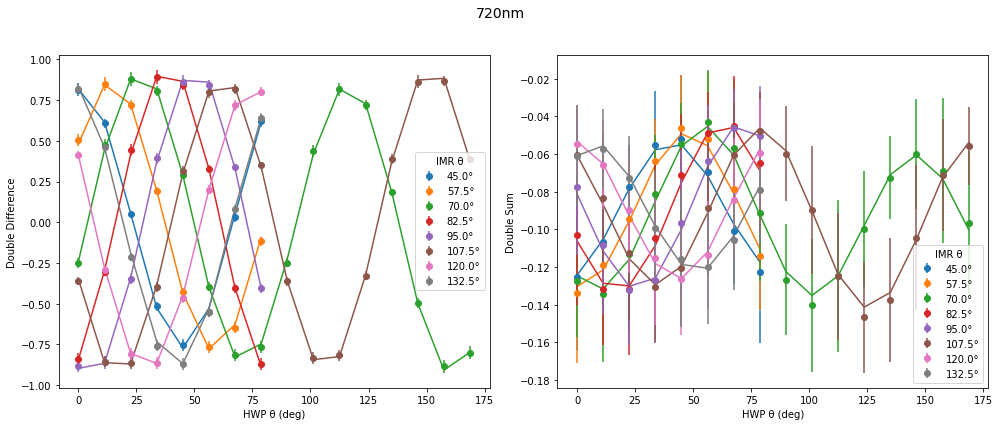

After p0: {'dichroic': {'phi': 7.408616134196675e-07, 'epsilon': 0.2925218922166919, 'theta': -44.606033144452425}, 'flc': {'phi': 3.2704400971388363, 'delta_theta': 1.2359380465112113}, 'optics': {'phi': 0.23518660574051342, 'epsilon': 0.0014673637277279371, 'theta': -1.475338221071512}, 'image_rotator': {'phi': 2.620641431055981}, 'hwp': {'phi': 2.986379704158642, 'delta_theta': 0.0654829639679988}, 'lp': {'theta': 4.511097755422224}}
Before p0: {'dichroic': {'phi': 7.408616134196675e-07, 'epsilon': 0.2925218922166919, 'theta': -44.606033144452425}, 'flc': {'phi': 3.2704400971388363, 'delta_theta': 1.2359380465112113}, 'optics': {'phi': 0.23518660574051342, 'epsilon': 0.0014673637277279371, 'theta': -1.475338221071512}, 'image_rotator': {'phi': 2.620641431055981}, 'hwp': {'phi': 2.986379704158642, 'delta_theta': 0.0654829639679988}, 'lp': {'theta': 4.511097755422224}}
Iteration #: 7
logl_value: 6.102379856974396
Best Fit Parameters: [ 2.38512681e-05  2.97530849e-01 -4.45924481e+01  3

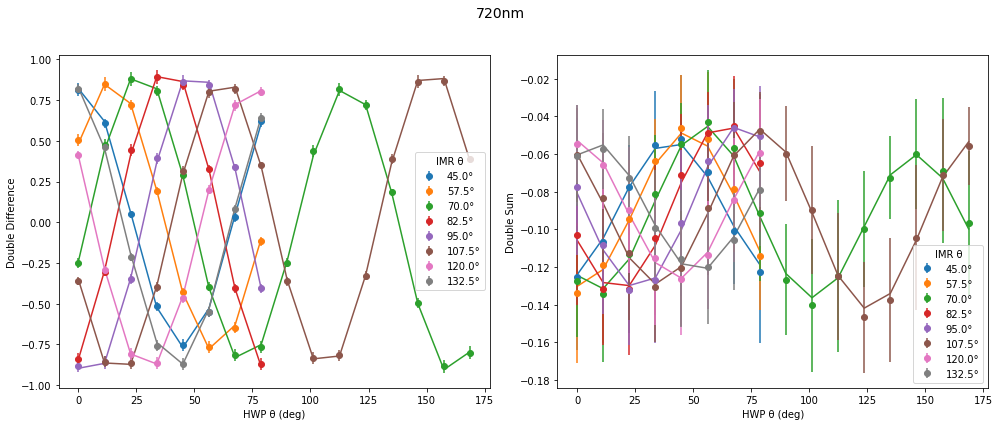

After p0: {'dichroic': {'phi': 2.3851268067155187e-05, 'epsilon': 0.2975308488258609, 'theta': -44.59244805776244}, 'flc': {'phi': 3.2717049245882794, 'delta_theta': 1.131496630513528}, 'optics': {'phi': 0.23861022993020697, 'epsilon': 0.0044853312822373875, 'theta': -2.3175449734304605}, 'image_rotator': {'phi': 2.6234349458723814}, 'hwp': {'phi': 2.984341327549043, 'delta_theta': -2.391929783621453}, 'lp': {'theta': -0.6108182578259927}}
Before p0: {'dichroic': {'phi': 2.3851268067155187e-05, 'epsilon': 0.2975308488258609, 'theta': -44.59244805776244}, 'flc': {'phi': 3.2717049245882794, 'delta_theta': 1.131496630513528}, 'optics': {'phi': 0.23861022993020697, 'epsilon': 0.0044853312822373875, 'theta': -2.3175449734304605}, 'image_rotator': {'phi': 2.6234349458723814}, 'hwp': {'phi': 2.984341327549043, 'delta_theta': -2.391929783621453}, 'lp': {'theta': -0.6108182578259927}}
Iteration #: 8
logl_value: 6.101881076100762
Best Fit Parameters: [ 8.20165083e-08  2.97548599e-01 -4.45921530e

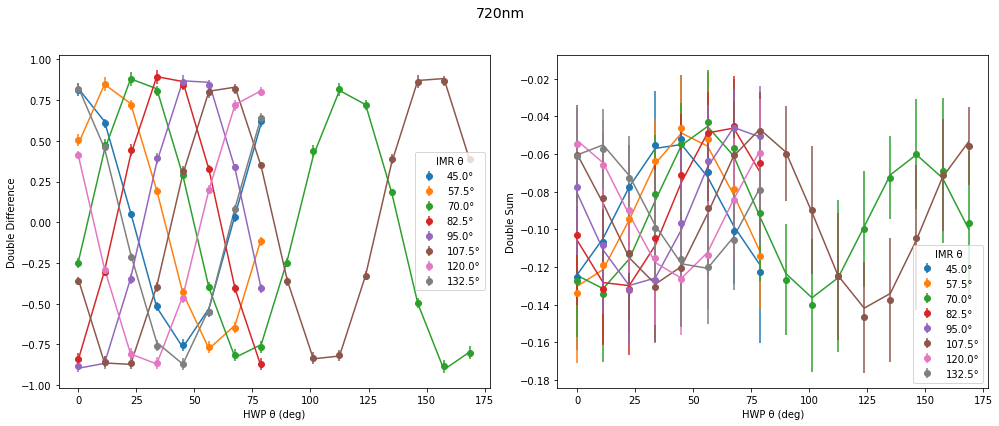

After p0: {'dichroic': {'phi': 8.201650831896357e-08, 'epsilon': 0.2975485993508715, 'theta': -44.592152979958996}, 'flc': {'phi': 3.2716468612416634, 'delta_theta': 1.1317270331582643}, 'optics': {'phi': 0.23876394075034102, 'epsilon': 0.004481832068957935, 'theta': -2.31079958706537}, 'image_rotator': {'phi': 2.6234445011742373}, 'hwp': {'phi': 2.9843859520500438, 'delta_theta': -2.3976807492926167}, 'lp': {'theta': -0.621950992226362}}
{'dichroic': {'phi': -0.15060529133346875, 'epsilon': 0.2947260746883915, 'theta': 35.808129724830195}, 'flc': {'phi': 3.5231674749347714, 'delta_theta': 2.547063907771257}, 'optics': {'phi': 0.8366868576245823, 'epsilon': 3.887450379959534e-09, 'theta': -59.919309379978884}, 'image_rotator': {'phi': 3.0680237129197785}, 'hwp': {'phi': 2.9838983981947838, 'delta_theta': 0.5155838549975353}, 'lp': {'theta': 0.674229408746958}}
[[0.48777083 0.48763575 0.01147865 0.        ]
 [0.48777083 0.48763575 0.01147865 0.        ]
 [0.         0.         0.       

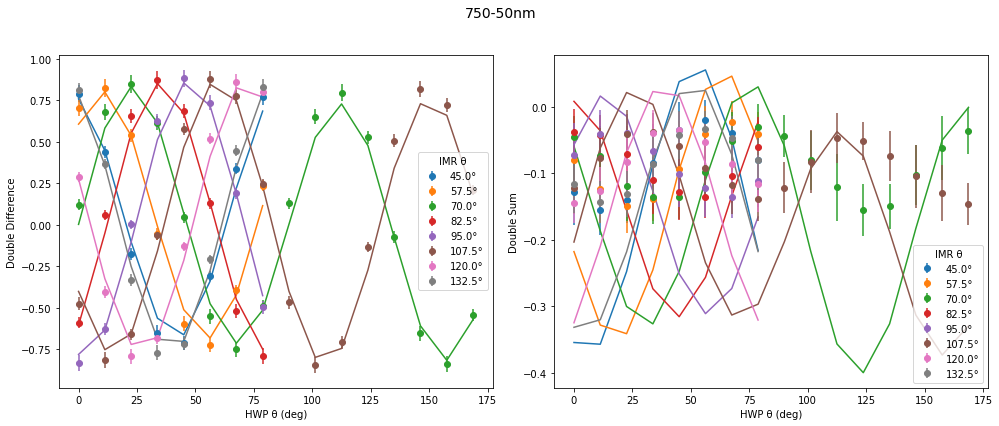

Before p0: {'dichroic': {'phi': 0.15060529133346875, 'epsilon': 0.2947260746883915, 'theta': 35.808129724830195}, 'flc': {'phi': 3.5231674749347714, 'delta_theta': 2.547063907771257}, 'optics': {'phi': 0.8366868576245823, 'epsilon': 3.887450379959534e-09, 'theta': -59.919309379978884}, 'image_rotator': {'phi': 3.0680237129197785}, 'hwp': {'phi': 2.9838983981947838, 'delta_theta': 0.5155838549975353}, 'lp': {'theta': 0.674229408746958}}
Iteration #: 1
logl_value: 39.85248958206536
Best Fit Parameters: [ 4.84335169e-07  2.72131240e-01  4.41750912e+01  3.28643776e+00
  1.41137224e+00  9.68280901e-01  7.01839786e-09 -6.96855807e+01
  3.06832283e+00  2.97807732e+00  5.91052038e-01  2.43158576e-01]


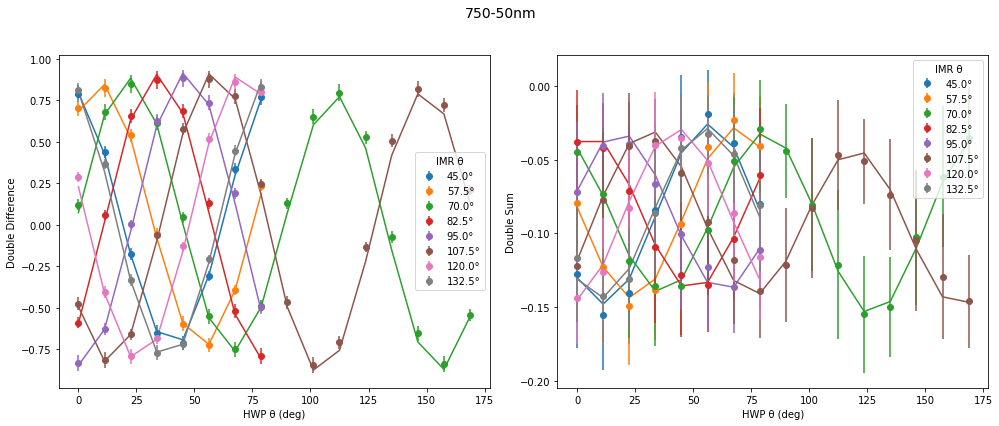

After p0: {'dichroic': {'phi': 4.843351692771982e-07, 'epsilon': 0.27213124042382086, 'theta': 44.17509121607581}, 'flc': {'phi': 3.2864377570008925, 'delta_theta': 1.411372242833418}, 'optics': {'phi': 0.9682809013831553, 'epsilon': 7.018397861149866e-09, 'theta': -69.68558070717697}, 'image_rotator': {'phi': 3.0683228328636716}, 'hwp': {'phi': 2.9780773178521587, 'delta_theta': 0.591052037533776}, 'lp': {'theta': 0.243158576051681}}
Before p0: {'dichroic': {'phi': 4.843351692771982e-07, 'epsilon': 0.27213124042382086, 'theta': 44.17509121607581}, 'flc': {'phi': 3.2864377570008925, 'delta_theta': 1.411372242833418}, 'optics': {'phi': 0.9682809013831553, 'epsilon': 7.018397861149866e-09, 'theta': -69.68558070717697}, 'image_rotator': {'phi': 3.0683228328636716}, 'hwp': {'phi': 2.9780773178521587, 'delta_theta': 0.591052037533776}, 'lp': {'theta': 0.243158576051681}}
Iteration #: 2
logl_value: 39.771533637126936
Best Fit Parameters: [ 1.21611686e-03  2.74694215e-01  4.41757519e+01  3.27

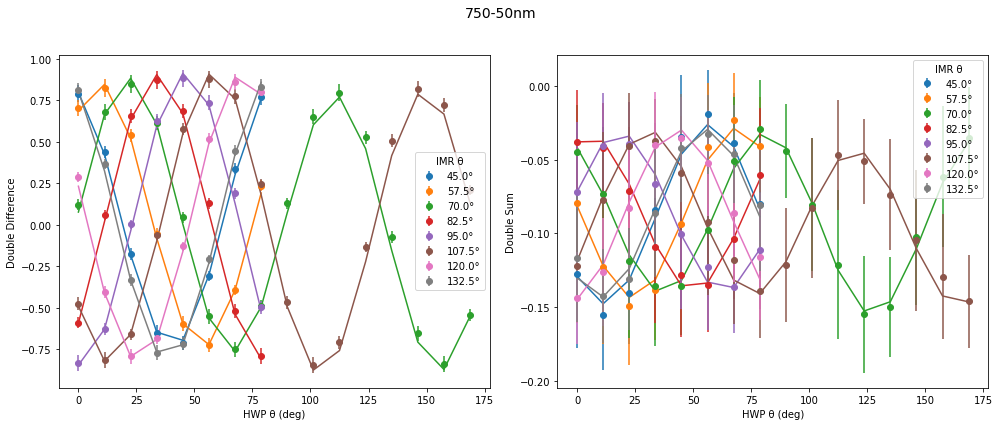

After p0: {'dichroic': {'phi': 0.0012161168629994282, 'epsilon': 0.2746942151071867, 'theta': 44.17575191657403}, 'flc': {'phi': 3.2772447119627355, 'delta_theta': 2.682659656507889}, 'optics': {'phi': 0.9768240984047845, 'epsilon': 0.00020481064054627307, 'theta': -67.70126401431378}, 'image_rotator': {'phi': 3.067178312979175}, 'hwp': {'phi': 2.976646220357839, 'delta_theta': -2.3819803438300546}, 'lp': {'theta': -3.017577060681715}}
{'dichroic': {'phi': 0.0012161168629994282, 'epsilon': 0.2746942151071867, 'theta': 44.17575191657403}, 'flc': {'phi': 3.2772447119627355, 'delta_theta': 2.682659656507889}, 'optics': {'phi': 0.9768240984047845, 'epsilon': 0.00020481064054627307, 'theta': -67.70126401431378}, 'image_rotator': {'phi': 3.067178312979175}, 'hwp': {'phi': 2.976646220357839, 'delta_theta': -2.3819803438300546}, 'lp': {'theta': -3.017577060681715}}
[[ 0.54094627  0.53794811 -0.05687435  0.        ]
 [ 0.54094627  0.53794811 -0.05687435  0.        ]
 [ 0.          0.          0

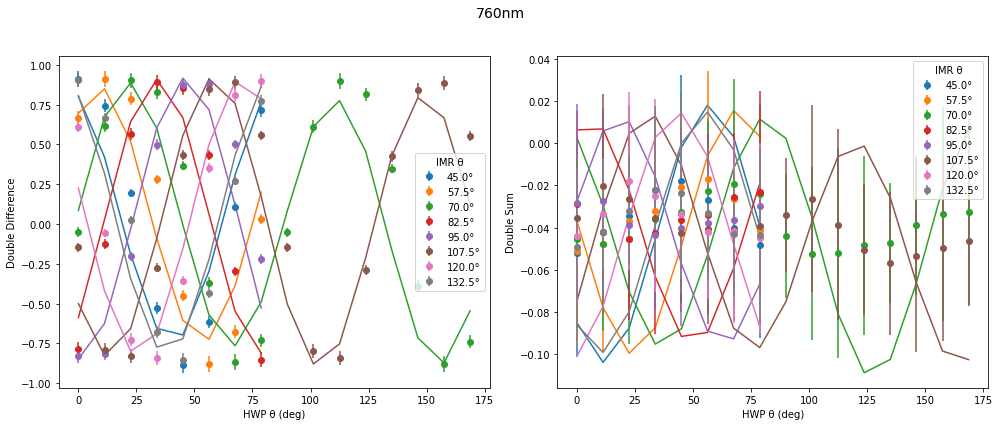

Before p0: {'dichroic': {'phi': 0.0012161168629994282, 'epsilon': 0.2746942151071867, 'theta': 44.17575191657403}, 'flc': {'phi': 3.2772447119627355, 'delta_theta': 2.682659656507889}, 'optics': {'phi': 0.9768240984047845, 'epsilon': 0.00020481064054627307, 'theta': -67.70126401431378}, 'image_rotator': {'phi': 3.067178312979175}, 'hwp': {'phi': 2.976646220357839, 'delta_theta': -2.3819803438300546}, 'lp': {'theta': -3.017577060681715}}
Iteration #: 1
logl_value: 306.982821056685
Best Fit Parameters: [ 1.72569338e-03  2.02230231e-04  1.80123158e+00  3.13111944e+00
 -4.95672526e+00  1.33368522e+00  5.73324640e-04 -8.80777720e+01
  3.14509708e+00  2.93459462e+00 -2.85036177e+00 -4.96826719e+00]


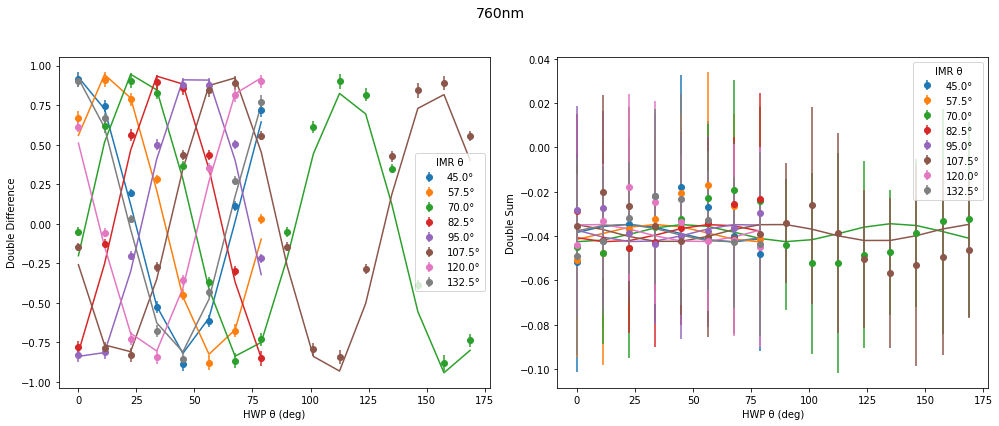

After p0: {'dichroic': {'phi': 0.0017256933830023212, 'epsilon': 0.00020223023102107428, 'theta': 1.801231576609934}, 'flc': {'phi': 3.1311194419725457, 'delta_theta': -4.956725260239615}, 'optics': {'phi': 1.3336852228417069, 'epsilon': 0.0005733246395214484, 'theta': -88.07777199126306}, 'image_rotator': {'phi': 3.1450970824290767}, 'hwp': {'phi': 2.934594623719999, 'delta_theta': -2.85036176681837}, 'lp': {'theta': -4.968267193862982}}
Before p0: {'dichroic': {'phi': 0.0017256933830023212, 'epsilon': 0.00020223023102107428, 'theta': 1.801231576609934}, 'flc': {'phi': 3.1311194419725457, 'delta_theta': -4.956725260239615}, 'optics': {'phi': 1.3336852228417069, 'epsilon': 0.0005733246395214484, 'theta': -88.07777199126306}, 'image_rotator': {'phi': 3.1450970824290767}, 'hwp': {'phi': 2.934594623719999, 'delta_theta': -2.85036176681837}, 'lp': {'theta': -4.968267193862982}}


In [4]:
# Defining wavelength
for i, wavelength in enumerate(wavelengths):
    interleaved_values, interleaved_stds, configuration_list = inst.read_csv(file_path, 
        obs_mode = obs_modes[i], obs_filter = wavelength)

    if obs_modes[i] == "IPOL":
        filename = previous_fits_directory + wavelength + "nm.txt"

    # Using closest broadband files    
    with open(filename, "r") as f:
        past_fit = json.load(f)
    print(past_fit)

    theta_pol = past_fit["lp"]["theta"]
    delta_HWP = past_fit["hwp"]["phi"] 
    offset_HWP = past_fit["hwp"]["delta_theta"]
    delta_derot = past_fit["image_rotator"]["phi"] 
    delta_opts = past_fit["optics"]["phi"]
    epsilon_opts = past_fit["optics"]["epsilon"]
    rot_opts = past_fit["optics"]["theta"]
    delta_dichroic = past_fit["dichroic"]["phi"]
    epsilon_dichroic = past_fit["dichroic"]["epsilon"]
    rot_dichroic = past_fit["dichroic"]["theta"]
    delta_FLC = past_fit["flc"]["phi"] 
    rot_FLC = past_fit["flc"]["delta_theta"]
    em_gain = em_gains[i] # from EM gain measurements

    # NOTE: Components must be listed downstream to upstream
    # Define the instrument configuration as a system dictionary
    system_dict = {
        "components": {
            "wollaston": {
                "type": "wollaston_prism_function",
                "properties": {"beam": "o", "transmission_ratio": em_gain},
            },
            "dichroic": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': delta_dichroic, 
                    'epsilon': epsilon_dichroic, 'theta': rot_dichroic},
            },
            "flc": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_FLC, "theta": 0, "delta_theta": rot_FLC},
            },
            "optics": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': 2 * np.pi * delta_opts, 
                    'epsilon': epsilon_opts, 'theta': rot_opts},
            },
            "image_rotator": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_derot, "theta": 0, "delta_theta": 0},
            },
            "hwp": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_HWP, "theta": 0, "delta_theta": offset_HWP},
            },
            "lp": {
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"theta": theta_pol},
            },
        }
    }

    # Turn dictionary into matrix
    system_mm = inst.generate_system_mueller_matrix(system_dict)
    print(system_mm.evaluate())

    # Set-up for p0
    p0 = {
    # "wollaston": {"transmission_ratio": em_gain}, 
    "dichroic": {"phi": np.abs(delta_dichroic), 
                 "epsilon": epsilon_dichroic, 
                 "theta": rot_dichroic},
    "flc": {"phi": delta_FLC, "delta_theta": rot_FLC},
    "optics": {"phi": np.abs(delta_opts), "epsilon": epsilon_opts, "theta": rot_opts},
    "image_rotator": {
                    "phi": delta_derot, 
                    # "delta_theta": 0
                    },
    "hwp": {"phi": delta_HWP, "delta_theta": offset_HWP},
    "lp": {"theta": theta_pol}
    }

    # Adding p0
    p0_values, p0_keywords = inst.parse_configuration(p0)
    s_in = np.array([1, 0, 0, 0])
    logl_value = inst.logl(p0_values, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list,
        s_in=s_in, logl_function=None, process_dataset=inst.process_dataset, process_errors=inst.process_errors, 
        process_model=inst.process_model)
    print("logl value: " + str(logl_value))

    # Plotting intial plot
    updated_system_mm = inst.update_system_mm(p0_values, p0_keywords, system_mm)
    model = inst.model(p0_values, p0_keywords, system_mm, configuration_list, 
        process_model = inst.process_model)

    inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
        configuration_list, wavelength = wavelength)

    # Iterative Fitting
    # Unpolarized light for s_in as there is LP in the system already
    s_in = np.array([1, 0, 0, 0])

    # Counters for iterative fitting
    iteration = 1
    previous_logl_value = 1000000
    new_logl_value = 0

    while abs(previous_logl_value - new_logl_value) > 0.01 * abs(previous_logl_value):
        print("Before p0: " + str(p0))
        if iteration > 1: 
            previous_logl_value = new_logl_value
        result, new_logl_value = inst.minimize_system_mueller_matrix(p0, system_mm, 
            interleaved_values, interleaved_stds, configuration_list, s_in = s_in,
            process_dataset = inst.process_dataset, 
            process_errors = inst.process_errors, 
            process_model = inst.process_model, bounds = bounds)
        
        # Print statements
        print("Iteration #: " + str(iteration))
        print("logl_value: " + str(new_logl_value))
        print("Best Fit Parameters: " + str(result.x))

        # Making a plot
        updated_system_mm = inst.update_system_mm(result.x, p0_keywords, system_mm)
        model = inst.model(result.x, p0_keywords, updated_system_mm, configuration_list, 
        process_model = inst.process_model)

        save_path = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints.png"
        inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
            configuration_list, wavelength = wavelength, save_path = save_path)

        # Updating p0 for next time
        inst.update_p0(p0, result.x)
        print("After p0: " + str(p0))

        iteration += 1

        filename = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"
        with open(filename, 'w') as f:
            json.dump(p0, f, indent=4)